In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# //from google.colab import drive
# //drive.mount('/content/drive/MyDrive/spam.csv')

In [3]:
df = pd.read_csv('file.csv')

In [4]:
df.shape

(13712, 2)

Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13712 entries, 0 to 13711
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEXT    13695 non-null  object 
 1   LABEL   13680 non-null  float64
dtypes: float64(1), object(1)
memory usage: 214.4+ KB


In [6]:
for col in df.columns:
    print(col)


TEXT
LABEL


In [7]:
df.head()

,TEXT,LABEL
0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0.0
1,What's up? Do you want me to come online? If y...,0.0
2,So u workin overtime nigpun?,0.0
3,"Also sir, i sent you an email about how to log...",0.0
4,Please Stay At Home. To encourage the notion o...,1.0


In [8]:
#columns_to_drop = ['Unnamed: 0', 'label_num']
#df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.head()

,TEXT,LABEL
0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0.0
1,What's up? Do you want me to come online? If y...,0.0
2,So u workin overtime nigpun?,0.0
3,"Also sir, i sent you an email about how to log...",0.0
4,Please Stay At Home. To encourage the notion o...,1.0


In [10]:
df.rename(columns={'TEXT':'message', 'LABEL':'message_type'},inplace=True)

In [11]:
df.sample(5)

,message,message_type
11446,this is for those that have interacted with d ...,0.0
8245,(1)Your full names(2)Contact address (3)Phone/...,1.0
553,Urgent! Please call 09061213237 from landline....,1.0
6722,Dear=2CI Hope This Mail Meets You In Good Heal...,1.0
13213,well i know a guy that split up from her that ...,0.0


In [12]:
df.isnull().sum()

message         17
message_type    32
dtype: int64

In [13]:
df.duplicated().sum()

263

In [14]:
df= df.drop_duplicates()
df.duplicated().sum()

0

In [15]:
df = df.fillna(0)

In [16]:
#df['message_type'] = df['message_type'].astype('int64')
#display(df.dtypes)
#df['message_type'] = df['message_type'].astype(float)
#display(df.dtypes)

Exploratory Data Analysis

In [17]:
df['message_type'].value_counts()

message_type
0.0    9905
1.0    3544
Name: count, dtype: int64

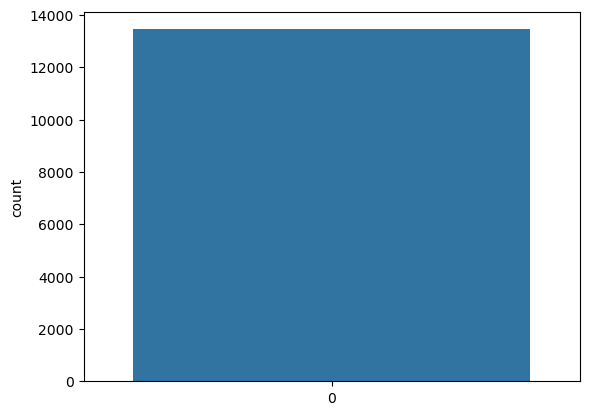

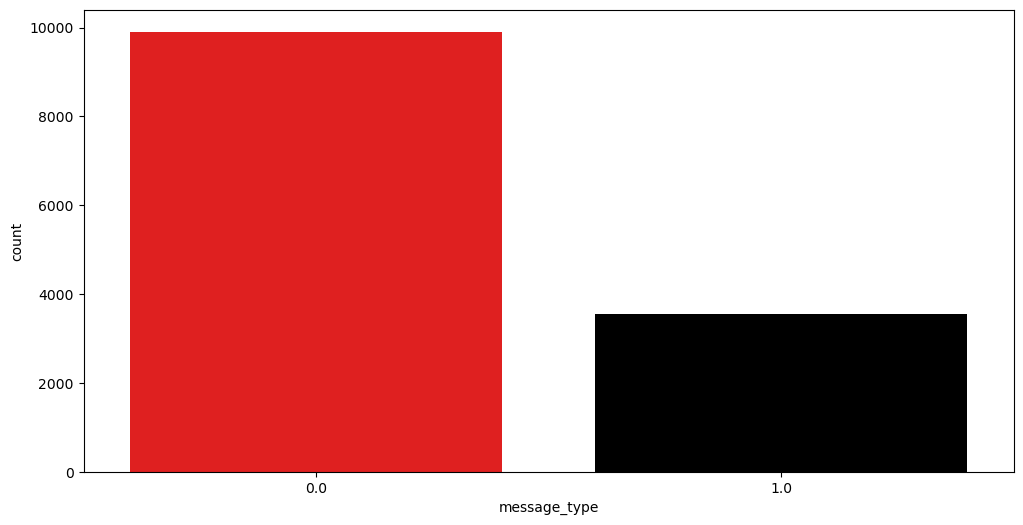

In [18]:
sns.countplot(df['message_type'])
colours=["red","black"]
plt.figure(figsize=(12, 6))  # Importing and using figure from matplotlib.pyplot
sns.countplot(data=df, x='message_type', palette=colours)
plt.show()

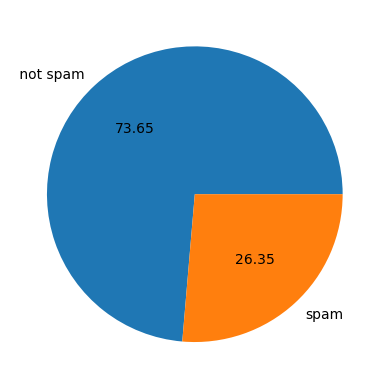

In [19]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [20]:
#converting it to a string (str(x)), and then counts the number of alphanumeric characters using the isalnum() method
df['num_characters'] = df['message'].apply(lambda x: sum(c.isalnum() for c in str(x)))
df.head()

,message,message_type,num_characters
0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0.0,99
1,What's up? Do you want me to come online? If y...,0.0,59
2,So u workin overtime nigpun?,0.0,23
3,"Also sir, i sent you an email about how to log...",0.0,136
4,Please Stay At Home. To encourage the notion o...,1.0,121


In [21]:
#find the number of alpha numeric characters in the messages column
#df['num_characters']=df['message'].apply(len)
#df.head()

In [22]:
#fetch number of words using NLTK
from nltk.tokenize import word_tokenize

# Check if the value is not an integer before applying word_tokenize
df['num_words'] = df['message'].apply(lambda x: len(word_tokenize(str(x))) if not isinstance(x, int) else 0)

In [23]:
#fetch number of words using NLTK
#word tokenization
#df['message'].apply(lambda x: nltk.word_tokenize(x))

In [24]:

df.sample(5)

,message,message_type,num_characters,num_words
11548,i ve seen articles on this type of stuff passi...,0.0,4894,1032
3247,S...i will take mokka players only:),0.0,26,10
7340,I am MR=2E KIMAEVA LIOUDMILA=2Cthe personal ac...,1.0,4208,458
10127,You both are in my prayers. Please email me yo...,0.0,129,32
3021,Lol they don't know about my awesome phone. I ...,0.0,66,20


In [25]:
#finding number of sentences
from nltk.tokenize import sent_tokenize  # Don't forget this import
df['num_sentences'] = df['message'].apply(lambda x: len(sent_tokenize(str(x))) if not isinstance(x, int) else 0)
df.sample(5)

,message,message_type,num_characters,num_words,num_sentences
7447,And after he lifted his hold the trade prefere...,0.0,235,52,3
2649,\tHere is your discount code RP176781. To stop...,1.0,108,19,4
12767,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0.0,76,14,1
11121,on mon NUMBER aug NUMBER jim whitehead wrote a...,0.0,266,64,1
12939,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0.0,70,13,1


In [26]:
#finding no. of sentences
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)) if not isinstance(x, int) else 0)
df.sample(5)

,message,message_type,num_characters,num_words,num_sentences
4639,Can you plz tell me the ans. BSLVYL sent via f...,0.0,46,12,2
13193,url URL date not supplied men trying for a bab...,0.0,127,24,1
3974,Ringtone Club: Gr8 new polys direct to your mo...,1.0,50,13,1
8863,This was on the Friends of the ARC blog. Brzez...,0.0,1063,240,9
3887,Nt joking seriously i told,0.0,22,5,1


In [27]:
#lets test the describe function on the new 3 columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,13449.000000,13449.000000,13449.000000
mean,615.607629,129.882519,2.844747
std,1703.756378,297.550011,5.597507
min,0.000000,0.000000,0.000000
25%,41.000000,13.000000,1.000000
50%,108.000000,28.000000,1.000000
75%,575.000000,125.000000,3.000000
max,32076.000000,6257.000000,205.000000


In [28]:
# lets check describe() for both ham and spam individually
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,9905.000000,9905.000000,9905.000000
mean,398.553256,85.442504,2.065018
std,1556.065264,279.608877,5.298693
min,0.000000,0.000000,0.000000
25%,32.000000,10.000000,1.000000
50%,70.000000,20.000000,1.000000
75%,228.000000,55.000000,2.000000
max,32076.000000,6257.000000,205.000000


In [29]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3544.000000,3544.000000,3544.000000
mean,1222.245203,254.086343,5.023984
std,1936.389363,310.732398,5.830297
min,0.000000,0.000000,0.000000
25%,121.000000,29.000000,1.000000
50%,721.000000,143.000000,3.000000
75%,1990.750000,429.250000,6.000000
max,31618.000000,3489.000000,96.000000


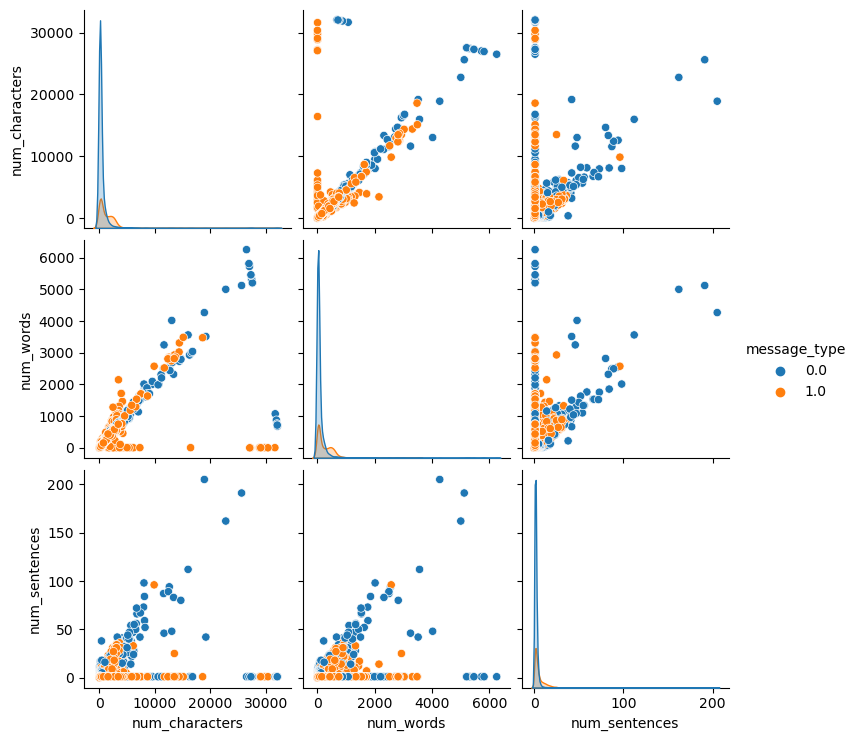

In [30]:
sns.pairplot(df,hue='message_type')

In [31]:
#df['message_type'] = df['message_type'].astype(float)
#df['message_type'] = pd.to_numeric(df['message_type'], errors='coerce')
#display(df.dtypes)

In [32]:
selected_columns = ['num_characters', 'num_words', 'num_sentences','message_type'] 
#selected_columns = ['message_type'] 
# Add the columns you want to include
correlation_matrix = df[selected_columns].corr()
print(correlation_matrix)

                num_characters  num_words  num_sentences  message_type
num_characters        1.000000   0.816891       0.379930      0.212989
num_words             0.816891   1.000000       0.506819      0.249696
num_sentences         0.379930   0.506819       1.000000      0.232887
message_type          0.212989   0.249696       0.232887      1.000000


In [33]:
#find correlation
#df.dropna(subset=['message_type'], inplace=True)
#df.corr()
#df.dropna(subset=['message_type'], inplace=True)  # Drop rows with NaN in 'message_type' column
#correlation_matrix = df.corr()  # Calculate the correlation matrix
#print(correlation_matrix)

In [34]:
#plotting a heatmap for the correlation
#sns.heatmap(df.corr(),annot=True)

## Preprocessing

In [35]:
## Removing stop words and punctuations
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english')) #length of stopwords available

179

In [36]:
#for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
##stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
ps.stem('playing')

#we got the stemmed version of the word

'play'

In [38]:
import nltk
from nltk.corpus import stopwords

def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)#tokenization  and after that text is converted to a list
    #so we run a loop in the message text
    y=[] #creating empty list to append
    for i in message:
        if i.isalnum():
            y.append(i)
    #now lets assign the y list back to the message
    #message = y   !!!!list can never be copied this way it is immutable data type so we have to do it by CLONING
    message=y[:]
    y.clear() #now y is cleared

    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()

    ##now stemming function
    for i in message:
        y.append(ps.stem(i))

    #return y  --> returns as list
    return " ".join(y)#returns in the form of string

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def text_transform(message):
    # Check if the input is an integer and convert to string
    if isinstance(message, int):
        message = str(message)
    elif not isinstance(message, str):
        raise ValueError("Input must be a string or integer")

    # Change to lowercase
    message = message.lower()

    # Tokenization
    message = nltk.word_tokenize(message)

    # Remove non-alphanumeric characters
    message = [word for word in message if word.isalnum()]

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    message = [word for word in message if word not in stop_words and word not in string.punctuation]

    # Stemming
    ps = PorterStemmer()
    message = [ps.stem(word) for word in message]

    return " ".join(message)


# Apply the text_transform function to the 'message' column
df['transformed_message'] = df['message'].apply(text_transform)

# Display the DataFrame with the transformed column
print(df)


                                                 message  message_type  \
0      Your opinion about me? 1. Over 2. Jada 3. Kusr...           0.0   
1      What's up? Do you want me to come online? If y...           0.0   
2                           So u workin overtime nigpun?           0.0   
3      Also sir, i sent you an email about how to log...           0.0   
4      Please Stay At Home. To encourage the notion o...           1.0   
...                                                  ...           ...   
13707   abc s good morning america ranks it the NUMBE...           1.0   
13708   hyperlink hyperlink hyperlink let mortgage le...           1.0   
13709   thank you for shopping with us gifts for all ...           1.0   
13710   the famous ebay marketing e course learn to s...           1.0   
13711   hello this is chinese traditional 子 件 NUMBER世...           1.0   

       num_characters  num_words  num_sentences  \
0                  99         37             11   
1        

In [40]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# import string

# ps = PorterStemmer()

# def text_transform(message):
#     print("Original Message:", message)

#     message = message.lower()  # change to lowercase
#     print("Lowercase Message:", message)

#     message = nltk.word_tokenize(message)  # tokenization
#     print("Tokenized Message:", message)

#     y = []
#     for i in message:
#         if i.isalnum():
#             y.append(i)
#     message = y[:]
#     y.clear()
#     print("Alphanumeric Message:", message)

#     for i in message:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)
#     message = y[:]
#     y.clear()
#     print("Stopwords and Punctuation Removed:", message)

#     for i in message:
#         y.append(ps.stem(i))
#     message = y[:]
#     y.clear()
#     print("Stemmed Message:", message)

#     result = " ".join(message)
#     print("Final Result:", result)

#     return result


In [41]:
text_transform("This is our KE project which worths USD $3000.")

'ke project worth usd 3000'

In [42]:
#text_transform(123) (lambda x: len(nltk.sent_tokenize(x)) if not isinstance(x, int) else 0)

Text transformation

In [43]:
# df['message'].apply(text_transform)
# from tqdm import tqdm
# #df['transformed_msg']=df['message'].apply(text_transform)
# df['transformed_msg']=tqdm(df['message'].apply(text_transform))


# # Replace df['message'].apply(text_transform) with tqdm(df['message'].apply(text_transform))

# #df.head()

In [44]:
# from tqdm.notebook import tqdm  # Import tqdm specifically for Jupyter notebooks

# # Apply tqdm to the 'message' column
# df['transformed_msg'] = df['message'].apply(lambda x: tqdm(text_transform(x), leave=False))

# # Optionally, you can force the progress bar to display
# for _ in tqdm(range(1), leave=True):
#     pass

# df.head()


Word cloud

In [45]:
#drawing a word cloud of maximum occuring words in the messages
from wordcloud import WordCloud
#create its object
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
##word cloud for SPAM
spam_wc=wc.generate(df[df['message_type']==1]['transformed_message'].str.cat(sep=""))

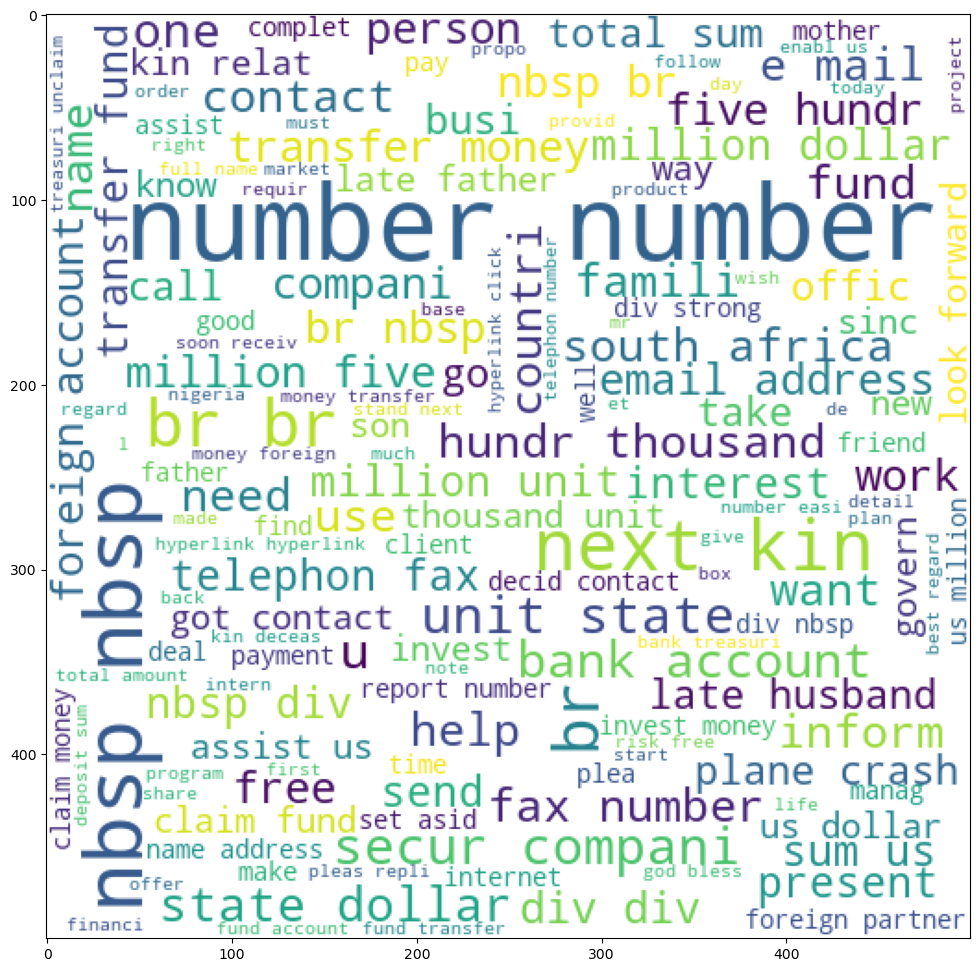

In [48]:
#display the word cloud---SPAM
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

In [50]:
## word cloud for ham messages
ham_wc=wc.generate(df[df['message_type']==0]['transformed_message'].str.cat(sep=" "))

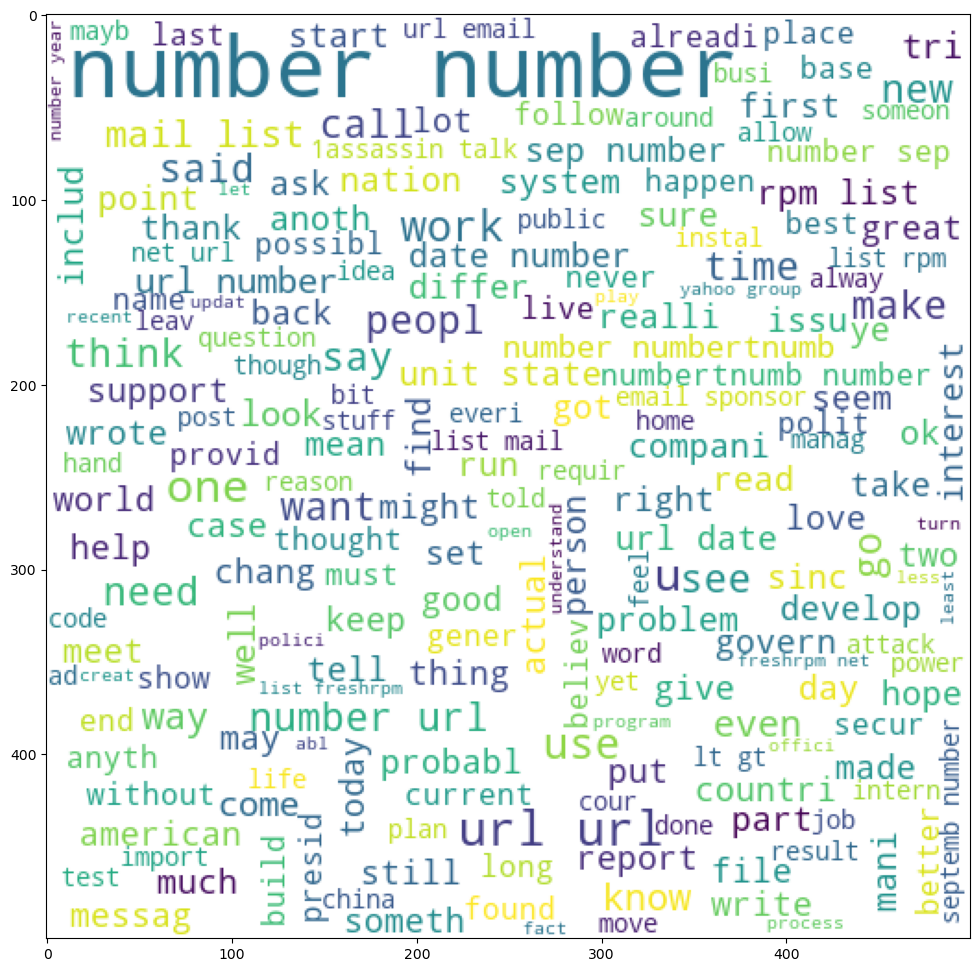

In [51]:
#show the wordcloud for ham messages
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)

In [53]:
##finding the top 30 words used in Ham and spam
##lets write a custom code for this
df[df['message_type']==1]['transformed_message'].tolist()

['pleas stay home encourag notion stay home citizen entitl emerg refund',
 'bankofamerica alert pleas follow http',
 'lyricalladi invit friend repli see stop send stop frnd 62468',
 'ur award citi break could win summer shop spree everi wk txt store 88039 skilgm tscs087147403233',
 'hello orang 1 month free access game news sport plu 10 free text 20 photo messag repli ye term appli',
 'new offer save upto electr bill power saver govt lab test rs free home deliveri 3 guarante call',
 'valu vodafon custom comput pick win prize collect easi call 09061743386',
 'reciev tone within next 24hr term condit pleas see channel u teletext pg 750',
 'phoni award today voda number end xxxx select receiv award match pleas call 08712300220 quot claim code 3100 standard rate app',
 'appl id buxcx7gbvwwccod final notif appl 1d due expir today prevent confirm appl id appl inc',
 'today voda number end 7548 select receiv 350 award match pleas call 08712300220 quot claim code 4041 standard rate app',
 'ove

In [54]:
##Lets print all the spam messages
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
 len(spam_corpus)

400067

In [56]:
## now lets find the most occuring words
from collections import Counter
Counter(spam_corpus)
#Top 30
Counter(spam_corpus).most_common(30)

[('number', 7496),
 ('money', 4435),
 ('br', 4113),
 ('bank', 3611),
 ('account', 3457),
 ('nbsp', 3222),
 ('fund', 2981),
 ('us', 2863),
 ('contact', 2187),
 ('busi', 2170),
 ('transfer', 1993),
 ('foreign', 1932),
 ('countri', 1872),
 ('assist', 1869),
 ('pleas', 1747),
 ('transact', 1747),
 ('compani', 1719),
 ('million', 1676),
 ('name', 1639),
 ('want', 1569),
 ('secur', 1562),
 ('invest', 1553),
 ('next', 1547),
 ('inform', 1488),
 ('one', 1465),
 ('deposit', 1447),
 ('email', 1440),
 ('receiv', 1379),
 ('dollar', 1356),
 ('claim', 1337)]

In [60]:
# spam_corpus=[]
# for msg in df[df['message_type']==1]['message'].tolist():
#     for word in msg.split():
#         spam_corpus.append(word)
# from collections import Counter
# Counter(spam_corpus)
# Counter(spam_corpus).most_common(30)
# plt.figure(figsize=(18,12))
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

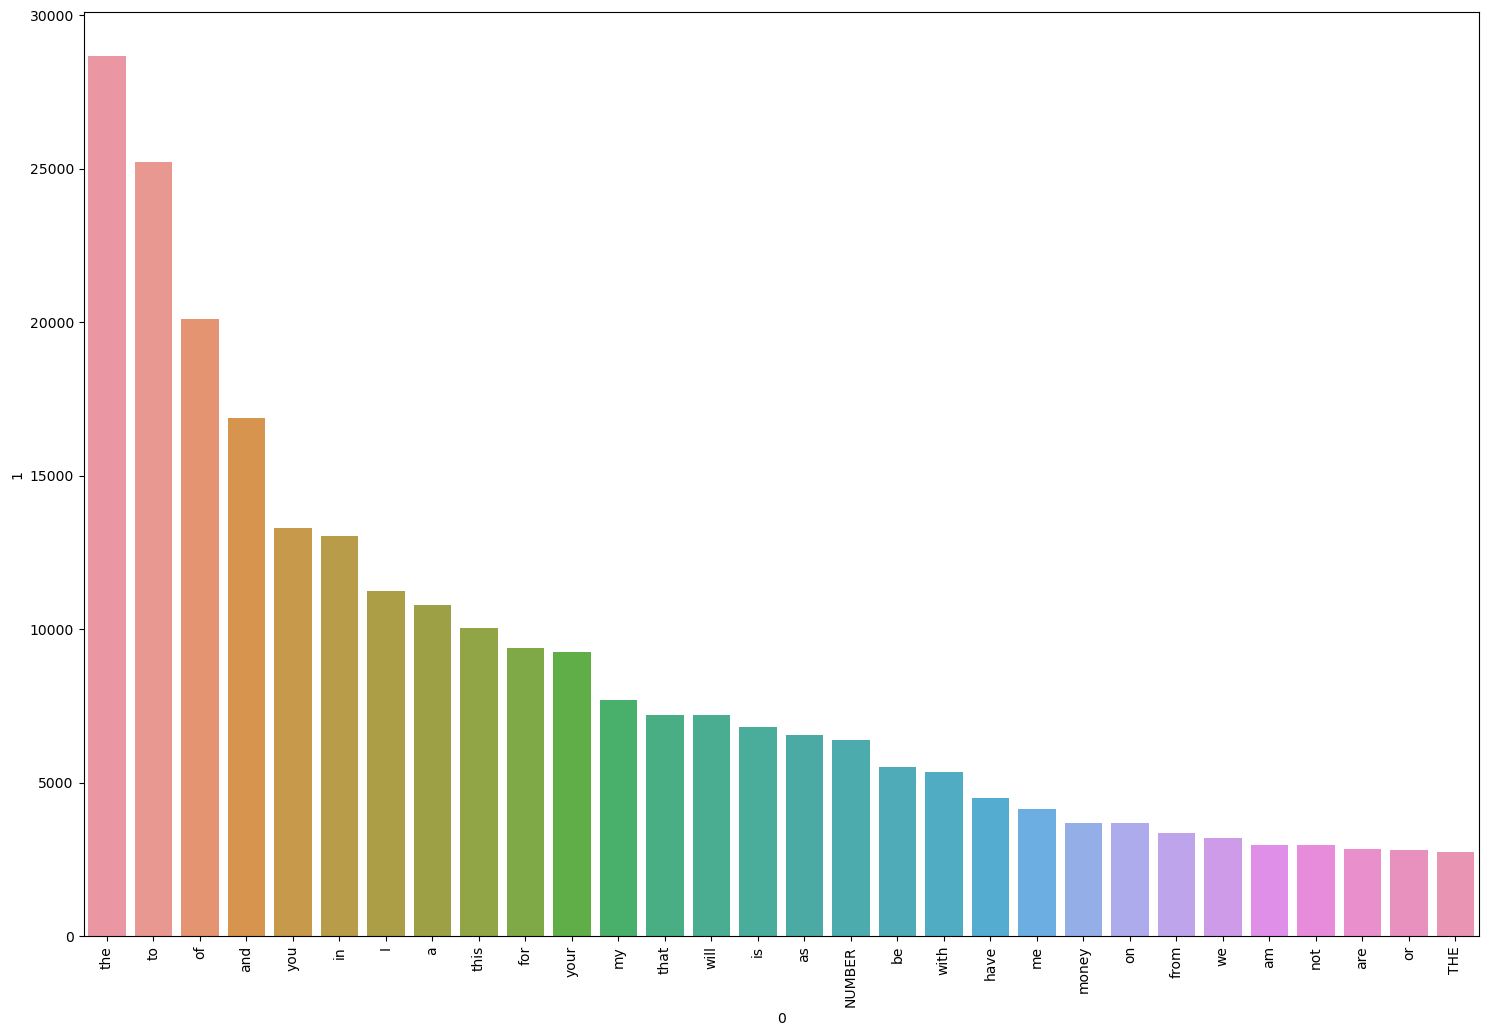

In [58]:

from collections import Counter

spam_corpus = []

for msg in df[df['message_type'] == 1]['message'].tolist():
    if isinstance(msg, str):  # Check if the element is a string
        for word in msg.split():
            spam_corpus.append(word)

word_counts = Counter(spam_corpus)
most_common_words = word_counts.most_common(30)

plt.figure(figsize=(18, 12))
sns.barplot(x=pd.DataFrame(most_common_words)[0], y=pd.DataFrame(most_common_words)[1])
plt.xticks(rotation='vertical')
plt.show()


#Vectorization

In [59]:
##Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [62]:
## toarray to convert from sparse array to dense array
X=cv.fit_transform(df['transformed_message']).toarray()
X.shape

(13449, 51881)

In [63]:
y=df['message_type'].values

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score

In [67]:
mnb = MultinomialNB()

###Evaluation

In [76]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred2))
print('Precision score: ',precision_score(y_test,y_pred2))
print('Recall score:',recall_score(y_test,y_pred2))
print('F1 score: ',f1_score(y_test, y_pred2))

Accuracy score:  0.9449814126394052
Confusion Matrix:  [[1887   73]
 [  75  655]]
Precision score:  0.8997252747252747
Recall score: 0.8972602739726028
F1 score:  0.8984910836762688


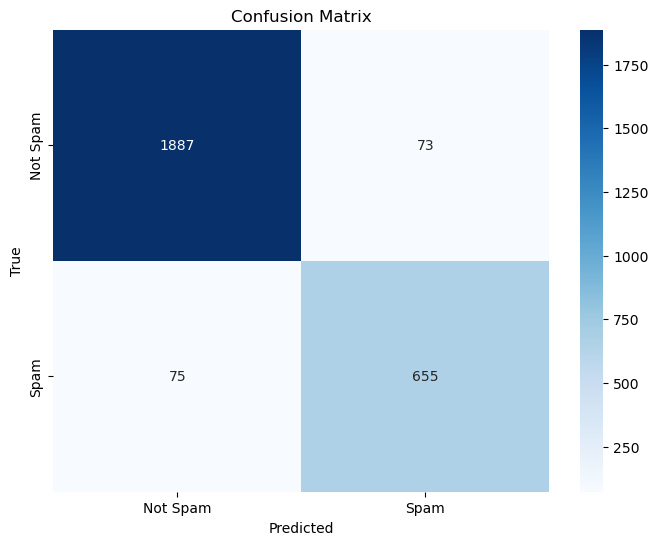

In [81]:
conf_matrix = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#TFIDF vectorizer

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf= TfidfVectorizer(max_features=3000)

In [85]:
X=tfidf.fit_transform(df['transformed_message']).toarray()

Model improvement

In [86]:
X.shape

(13449, 3000)

In [87]:
y=df['message_type'].values

In [88]:
from sklearn.model_selection import train_test_split

In [89]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [90]:
mnb = MultinomialNB()

In [91]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9524163568773234
Confusion Matrix of Multinomial NB is:  [[1936   24]
 [ 104  626]]
Precision score of the Multinomial NB is 0.963076923076923


In [92]:
#precision score 1. no false positive

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [95]:
#Creating objects of every algorithm
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [97]:
# create a dictionary of classifiers
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'LR': lrc,
    'RF': rfc,
}

In [98]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [99]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9643122676579926, 0.9620991253644315)

In [100]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9643122676579926
Precision -  0.9620991253644315
For  KN
Accuracy -  0.8631970260223049
Precision -  0.9813829787234043
For  NB
Accuracy -  0.9524163568773234
Precision -  0.963076923076923
For  LR
Accuracy -  0.9639405204460967
Precision -  0.9730941704035875
For  RF
Accuracy -  0.9702602230483272
Precision -  0.9779411764705882


In [101]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [102]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.863197,0.981383
4,RF,0.970260,0.977941
3,LR,0.963941,0.973094
2,NB,0.952416,0.963077
0,SVC,0.964312,0.962099


In [103]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [104]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.863197
1,RF,Accuracy,0.970260
2,LR,Accuracy,0.963941
3,NB,Accuracy,0.952416
4,SVC,Accuracy,0.964312
5,KN,Precision,0.981383
6,RF,Precision,0.977941
7,LR,Precision,0.973094
8,NB,Precision,0.963077
9,SVC,Precision,0.962099


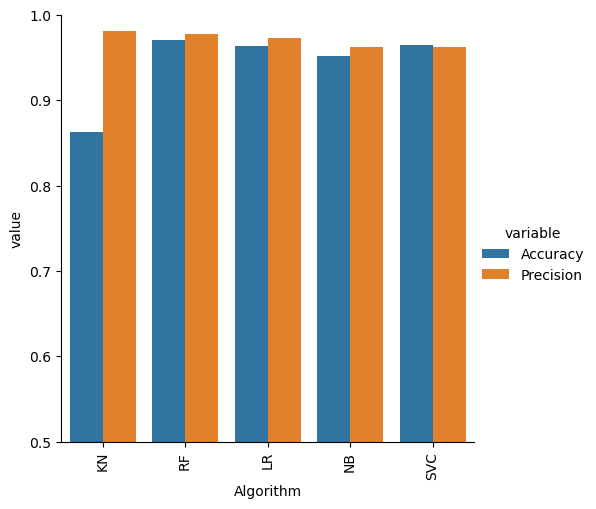

In [105]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [139]:
input_data=input('Enter your text:')

Enter your text:	Todays Voda numbers ending 7548 are selected to receive a $350 award. If you have a match please call 08712300220 quoting claim code 4041 standard rates app


In [144]:
input_data_transformed = tfidf.transform([input_data])
prediction = mnb.predict(input_data_transformed)
#print("Prediction:", prediction)
if prediction == 1:
    print("This is spam.")
else:
    print("Not spam.")

This is spam.


#saving the trained model

In [117]:
classifier=MultinomialNB()

In [118]:
import pickle
filename='trained_model.sav'
pickle.dump(mnb,open(filename,'wb'))

In [113]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

loading the save model

In [120]:
loaded_model=pickle.load(open('trained_model.sav','rb'))